<a href="https://colab.research.google.com/github/SnSabu/congressional-analysis/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relationship Between Employee Attrition and Education Level**

By Sneha Sabu and Nidhi Athreya Mysore

28 February 2023

**Introduction:**
With all the layoffs happening around the world, we wanted to delve deeper into the statistics of the other side of the coin, that is people leaving their employement. We wanted to know if there is any correlation between people leaving their jobs, and their level of education. We think that education plays a very important role, as it is a deciding factor while leaving any job or while being forced to leave a job. 
Our initial hypothesis is that people with higher education degrees have a lower attrition rate. To support this hypothesis, we considered anyalyzing a dataset contatining employement details, education details, workplace environment and so on.
To understand the data better, we created visualizations to see which education degree is associated with higher attrition rate. So here are the visualizations:



**Data:**

This dataset from Kaggle is a fictional datasource showing different factors affecting attrition in IBM employees. 
Here is a link to the data source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?select=WA_Fn-UseC_-HR-Employee-Attrition.csv

This table contains a variety of data that might affect attrition such as : 

*   Education (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor')

*   EnvironmentSatisfaction (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

*   JobInvolvement (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

*   JobSatisfaction (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

*   PerformanceRating (1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding')

*   RelationshipSatisfaction (1 'Low', 2 'Medium', 3 'High', 4 'Very High')

*   WorkLifeBalance (1 'Bad', 2 'Good', 3 'Better', 4 'Best')

**Importing Libraries**

In [ ]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

**Read the dataset**

In [ ]:
Employee_Attrition = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

**Exploration of the Employee Attrition dataset**

In [ ]:
Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
Employee_Attrition.info()

In [ ]:
# Data Cleaning
Employee_Attrition['EducationLevel'] = Employee_Attrition['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelors', 4: 'Masters', 5: 'Doctor'})

**Distribuition of employees across education levels**

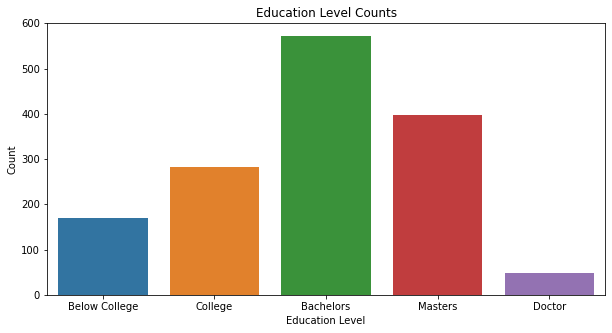

In [ ]:
#Histogram
education_counts = Employee_Attrition['EducationLevel'].value_counts()
edu_order = ['Below College', 'College', 'Bachelors', 'Masters', 'Doctor']
education_counts = Employee_Attrition['EducationLevel'].value_counts().reindex(edu_order)
fig, (ax1) = plt.subplots(figsize=(10,5))
sns.barplot(x=education_counts.index, y=education_counts.values, ax=ax1)
ax1.set_title('Education Level Counts')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
plt.show()



The majority of the employees have a Bachelors degree

**Employee Attrition by Education Level**

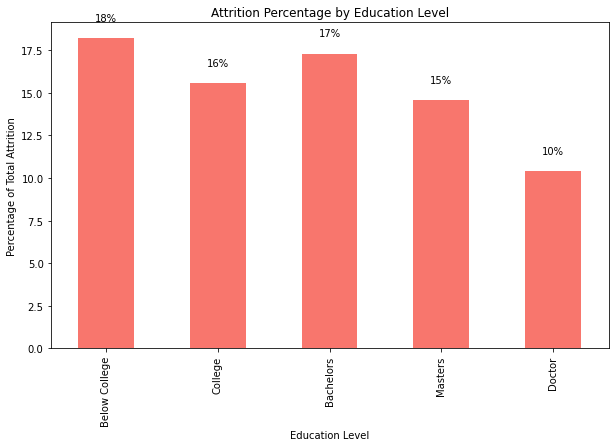

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15,10))

emp_edu_level_count = Employee_Attrition.groupby(['EducationLevel']).size()
edu_order = ['Below College', 'College', 'Bachelors', 'Masters', 'Doctor']
filtered_data = Employee_Attrition[Employee_Attrition["Attrition"] == "Yes"]
grouped_count = filtered_data.groupby(['EducationLevel']).size()
percentages = grouped_count.divide(emp_edu_level_count) * 100
percentages = percentages.reindex(edu_order)

ax = percentages.plot(kind='bar', figsize=(10, 6), color='#F8766D')

ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of Total Attrition')
ax.set_title('Attrition Percentage by Education Level')

for i, v in enumerate(percentages):
    ax.text(i, v + 1, f"{v:.0f}%", ha="center")

plt.show()


When considering the employees from each education level separately, we can see that attrition level is least for employees with Doctorate and highest for employees without a college degree

**Confounding Variables**

***Work Life Balance***: Employees who have better work life balance may be less likely to leave the company, and they may also have higher levels of education.

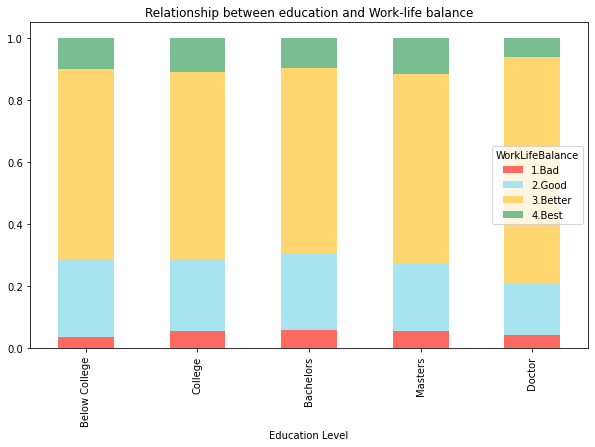

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Employee_Attrition['WorkLifeBalance'] = Employee_Attrition['WorkLifeBalance'].replace({1: '1.Bad', 2: '2.Good', 3: '3.Better', 4: '4.Best'})
edu_order = ['Below College', 'College', 'Bachelors', 'Masters', 'Doctor']
grouped = Employee_Attrition.groupby(['EducationLevel', 'WorkLifeBalance']).size().unstack()

totals = grouped.sum(axis=1)
percentages = grouped.divide(totals, axis=0)
percentages = percentages.reindex(edu_order)

colors = ['#FF6962', "#A8E4EF", "#FFD670", '#7ABD91']

ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

ax.set_xlabel('Education Level')
#ax.set_ylabel('')
ax.set_title('Relationship between education and Work-life balance')

plt.show()




Highest number of employees from the doctorate degree category report Better and Best work life balance

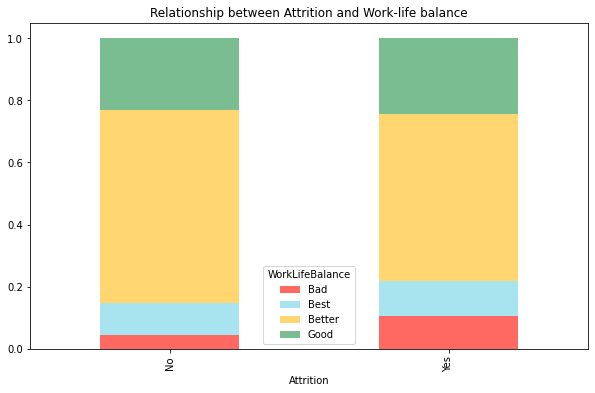

In [ ]:
#Inspecting work life balance as a confounding variable

#Work life balance vs education
Employee_Attrition['WorkLifeBalance'] = Employee_Attrition['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})

grouped = Employee_Attrition.groupby(['Attrition', 'WorkLifeBalance']).size().unstack()

totals = grouped.sum(axis=1)
percentages = grouped.divide(totals, axis=0)

colors = ['#FF6962', "#A8E4EF", "#FFD670", '#7ABD91']

ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

ax.set_xlabel('Attrition')
#ax.set_ylabel('')
ax.set_title('Relationship between Attrition and Work-life balance')

plt.show()




As expected, employees that report a bad work life balance show the most number of attrition

**Test of Statistical Significance**

***Chi-Square test between education level and attrition***



In [ ]:
# Chi-Square test
# Education level vs attrition
df = Employee_Attrition
x = df['EducationLevel'] # independent variable
y = df['Attrition'] # dependent variable


chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(x,y))
print('Chi-square statistic =', chi2)
print('p-value =', p)




Chi-square statistic = 3.0739613982367193
p-value = 0.5455253376565949


The p-value is greater than the 0.05.

We retain the null hypothesis.

We conclude that there is no statistically significant relationship between 'EducationLevel' and 'Attrition'.

***Chi-Square test between work life balance and attrition***

In [ ]:
# Work life balance vs attrition
df = Employee_Attrition
x = df['WorkLifeBalance'] # independent variable
y = df['Attrition'] # dependent variable


chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(x,y))
print('Chi-square statistic =', chi2)
print('p-value =', p)



Chi-square statistic = 16.3250970916474
p-value = 0.0009725698845348824


The p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a statistically significant relationship between 'EducationLevel' and 'Attrition'.


**Appendix**

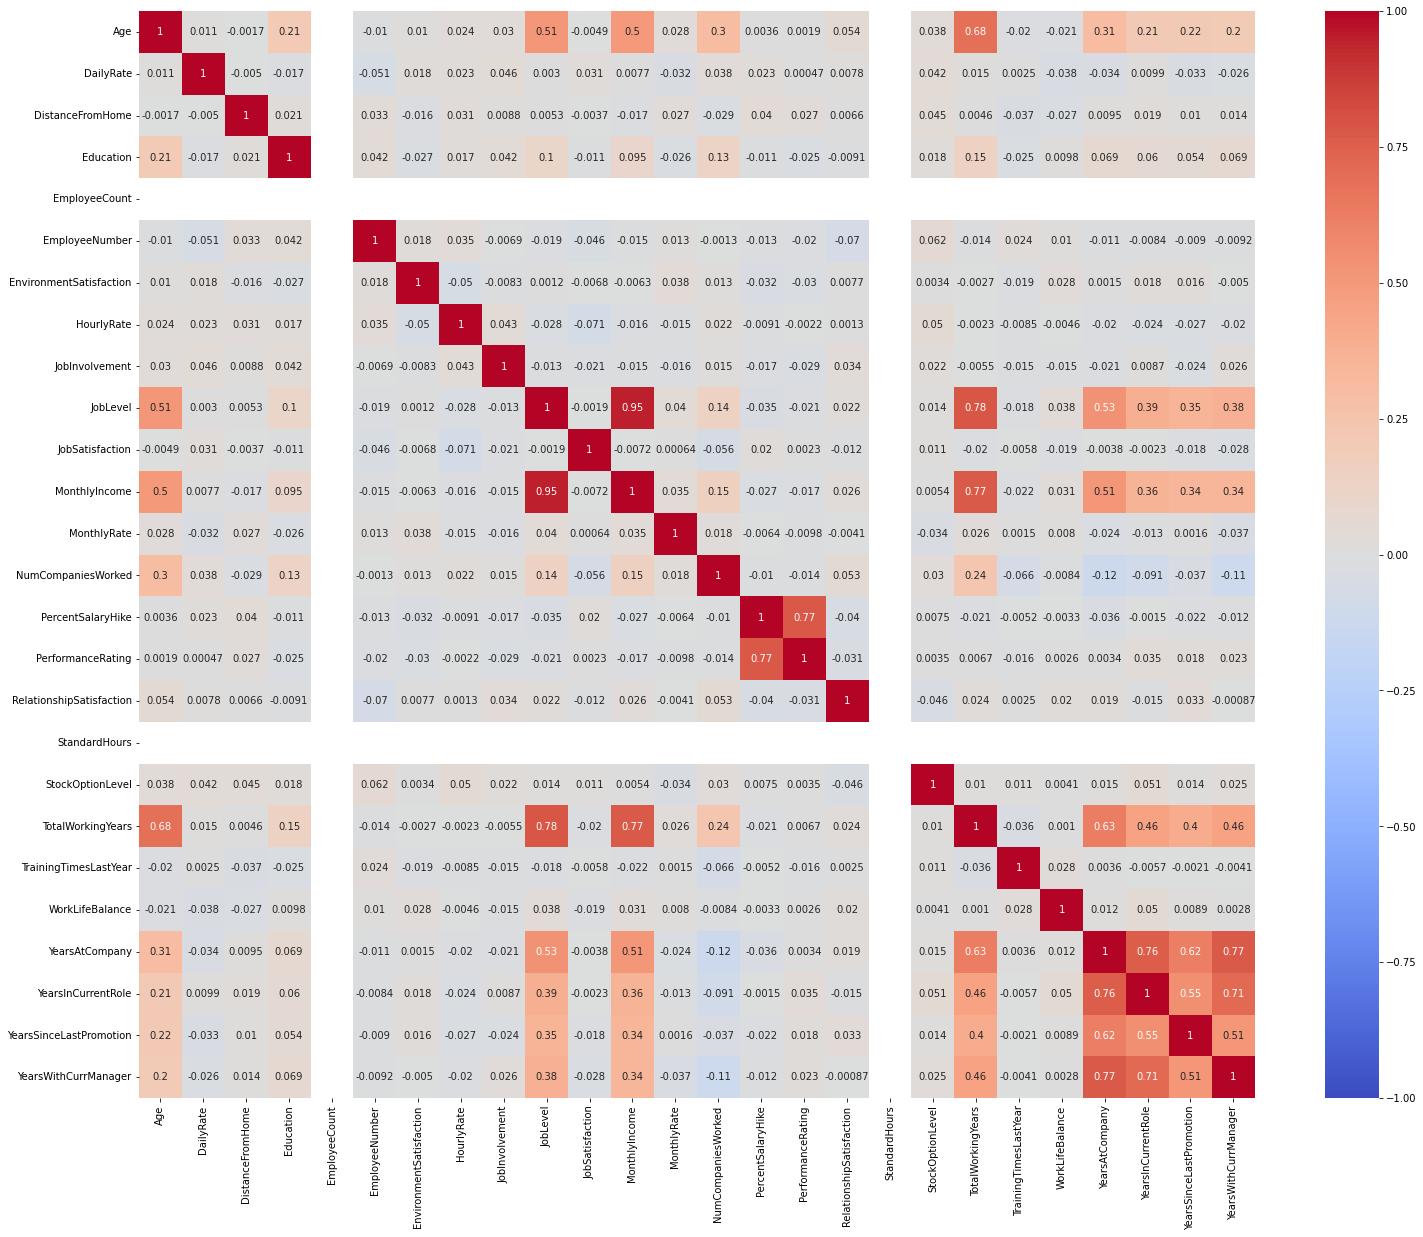

In [ ]:
# Data Exploration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Employee_Attrition_Subset = Employee_Attrition[['EducationLevel', 'Attrition']]

# create the correlation matrix
corr = Employee_Attrition.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


We see a high correlation between "Years With Current Manager" and other variables such as "Years At Company", "Years in Current Role" and "Years since last Promotion"